# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [48]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'

In [49]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/supplementary_serendipitously_optimal_stimulation'

In [50]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet='master_list_proper_subjects')
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,NaN,28,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,NaN,22,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,NaN,17,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,NaN,...,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [51]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

In [52]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [53]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,NaN,28,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,NaN,22,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,NaN,17,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [45]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

Set the parameters for dropping rows

In [57]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = 'Queensland'  # The value to compare against

In [58]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
106,29,71.0,NaN,-1.841156,-1.369978,-7.142857,-0.330043,-0.9000,20.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,30,49.0,NaN,-0.579117,-0.712797,-3.448276,0.184170,-0.3110,24.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,31,69.0,NaN,1.776691,0.513941,3.448276,0.726951,0.3160,27.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,34,76.0,NaN,-3.342660,-2.151855,-11.538462,-0.501447,-1.0900,19.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,35,58.0,NaN,1.776691,0.513941,3.448276,0.112752,-0.3950,23.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,36,62.0,NaN,1.912603,0.584714,3.846154,1.326866,1.0100,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,37,47.0,NaN,3.038731,1.171122,7.142857,1.569689,1.2800,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,38,66.0,NaN,0.598787,-0.099428,0.000000,-0.444312,-1.0300,19.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,39,63.0,NaN,-0.621185,-0.734703,-3.571429,0.369858,-0.0931,25.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,40,56.0,NaN,-0.579117,-0.712797,-3.448276,0.112752,-0.3930,23.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

# 02 Plot

**Grouped Barplot**
- Expects a Dataframe with a category the grouping variable that sets colour. 
- variable represents each thig to be plotted, like 'neuroimaging, bias, etc'. 
- metric is the value of the variable to be plotted.

In [54]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau


# def plot_scatter_with_kde(self, hline_value=None, vline_value=None):
#     fig, axes = plt.subplots(self.rows_per_fig, self.cols_per_fig, figsize=(self.cols_per_fig * 5, self.rows_per_fig * 5))
#     axes = axes.flatten()
#     current_ax = 0

#     for dependent_var, independent_vars in self.data_dict.items():
#         self.dependent_var = dependent_var
#         for independent_var in independent_vars:
#             if current_ax >= len(axes):
#                 self.figures.append(fig)
#                 fig, axes = plt.subplots(self.rows_per_fig, self.cols_per_fig, figsize=(self.cols_per_fig * 5, self.rows_per_fig * 5))
#                 axes = axes.flatten()
#                 current_ax = 0

#             sns.scatterplot(x=independent_var, y=dependent_var, data=self.dataframe, ax=axes[current_ax])

#             if hline_value is not None:
#                 axes[current_ax].axhline(y=hline_value, color='black', linestyle='--')

#             if vline_value is not None:
#                 axes[current_ax].axvline(x=vline_value, color='black', linestyle='--')

#             if self.ylim is not None:
#                 axes[current_ax].set_ylim(self.ylim[0], self.ylim[1])

#             axes[current_ax].set_title(independent_var)
#             axes[current_ax].set_xlabel(self.x_label)
#             axes[current_ax].set_ylabel(self.y_label)

#             current_ax += 1

#     self.figures.append(fig)  # Append the last figure


In [55]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_with_shaded_sectors(dataframe, x_column, y_column, hline_value, vline_value, x_label='X Label', y_label='Y Label', title='Scatterplot with Shaded Sectors', out_dir=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=dataframe)
    
    # Draw horizontal and vertical lines
    plt.axhline(y=hline_value, color='black', linestyle='--')
    plt.axvline(x=vline_value, color='black', linestyle='--')
    
    # Get current plot limits
    xlim = plt.xlim()
    ylim = plt.ylim()
    
    # Shade areas
    # Left of the vertical line and above the horizontal line
    plt.fill_betweenx(y=[hline_value, ylim[1]], x1=xlim[1], x2=vline_value, color='green', alpha=0.2)
    # Right of the vertical line and below the horizontal line
    plt.fill_betweenx(y=[ylim[0], hline_value], x1=vline_value, x2=xlim[0], color='green', alpha=0.2)
    
    
    # Set plot limits back to original, as fill_betweenx might change them
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Ensure the output directory exists
    if out_dir is not None:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(os.path.join(out_dir, 'shaded_sector_plot.svg'), format='svg')


    plt.show()


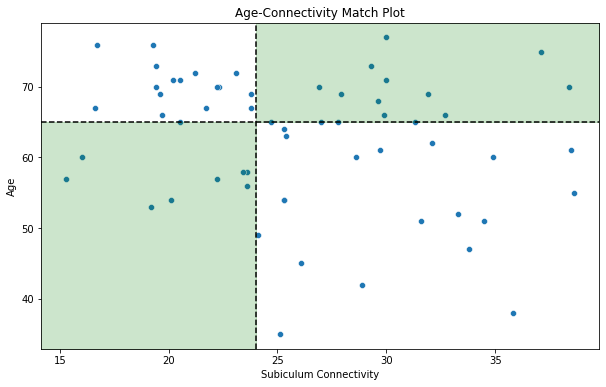

In [59]:
plot_scatter_with_shaded_sectors(data_df, 'Subiculum_Connectivity_T', 'Age', hline_value=65, vline_value=24,
                        x_label='Subiculum Connectivity', y_label='Age', title='Age-Connectivity Match Plot',
                        out_dir=out_dir)